In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 크기 및 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
df = pd.read_csv('./data/df_drop.csv')
df.head()

,year,month,day,hour,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,tailnum,year_plane,model
0,2013,1,1,5,517.0,515,2.0,830.0,819,-11.0,UA,1545,EWR,IAH,N14228,1999.0,737-824
1,2013,1,1,5,533.0,529,4.0,850.0,830,-20.0,UA,1714,LGA,IAH,N24211,1998.0,737-824
2,2013,1,1,5,542.0,540,2.0,923.0,850,-73.0,AA,1141,JFK,MIA,N619AA,1990.0,757-223
3,2013,1,1,5,544.0,545,-1.0,1004.0,1022,18.0,B6,725,JFK,BQN,N804JB,2012.0,A320-232
4,2013,1,1,6,554.0,600,-6.0,812.0,837,25.0,DL,461,LGA,ATL,N668DN,1991.0,757-232


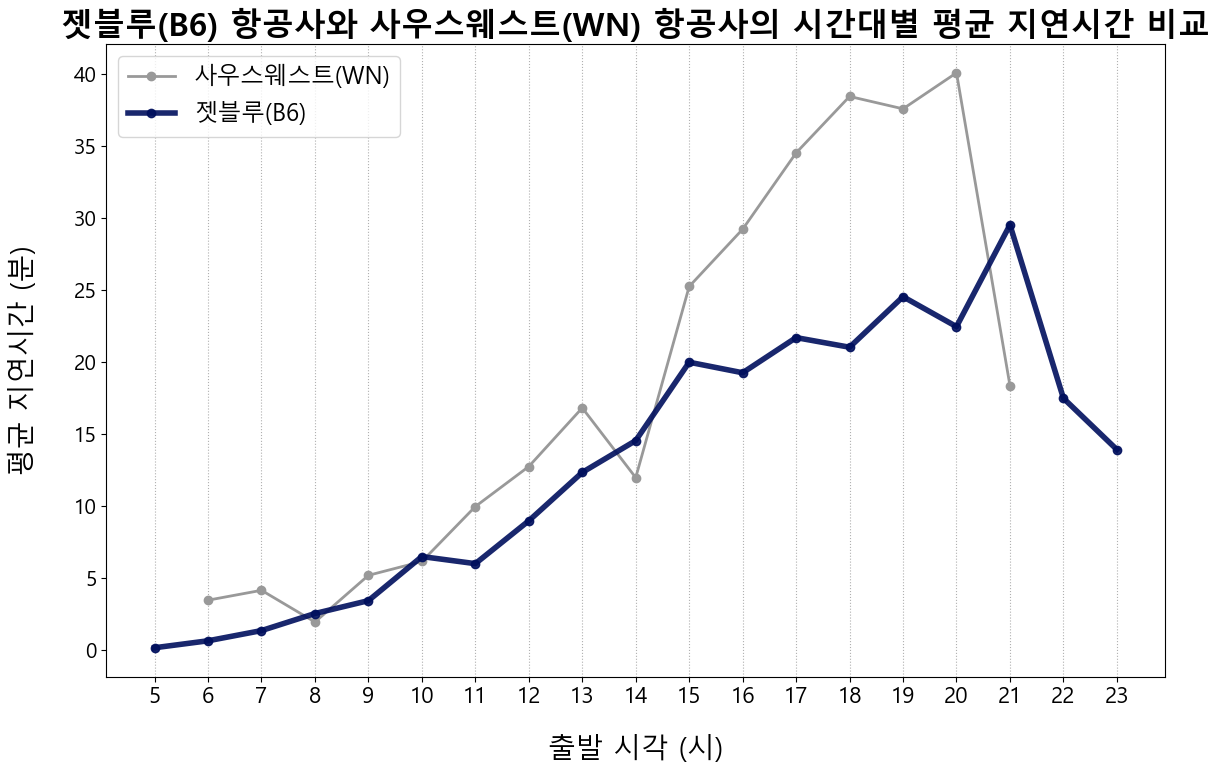

In [10]:

# B6, WN 데이터만 추출
b6_wn = df[df['carrier'].isin(['B6', 'WN'])].copy()

# 시간대별 평균 지연 계산
b6_delay = b6_wn[b6_wn['carrier'] == 'B6'].groupby('hour')['dep_delay'].mean().reset_index()
b6_delay.rename(columns={'dep_delay': 'b6_delay'}, inplace=True)
wn_delay = b6_wn[b6_wn['carrier'] == 'WN'].groupby('hour')['dep_delay'].mean().reset_index()
wn_delay.rename(columns={'dep_delay': 'wn_delay'}, inplace=True)
b6wn_result = pd.merge(b6_delay, wn_delay, on='hour', how='outer').sort_values('hour')
b6wn_plot = b6wn_result[(b6wn_result['hour'] >= 5) & (b6wn_result['hour'] <= 23)]

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(b6wn_plot['hour'], b6wn_plot['wn_delay'], marker='o', color='#999999', linewidth=2, label='사우스웨스트(WN)')
plt.plot(b6wn_plot['hour'], b6wn_plot['b6_delay'], marker='o', color='#000f5d', linewidth=4, alpha=0.9, label='젯블루(B6)')

plt.xticks(b6wn_plot['hour'], fontsize=16)
plt.xlabel('출발 시각 (시)', fontsize=20, labelpad=20)
plt.ylabel('평균 지연시간 (분)', fontsize=20, labelpad=25)
plt.title(
    '젯블루(B6) 항공사와 사우스웨스트(WN) 항공사의 시간대별 평균 지연시간 비교', 
    fontsize=23, 
    pad=5,
    fontweight="bold" # 제목을 위쪽 중앙에 정렬
)

plt.legend(fontsize=17, loc='upper left')
plt.grid(True, axis='x', linestyle=':')
plt.tight_layout()
plt.show()


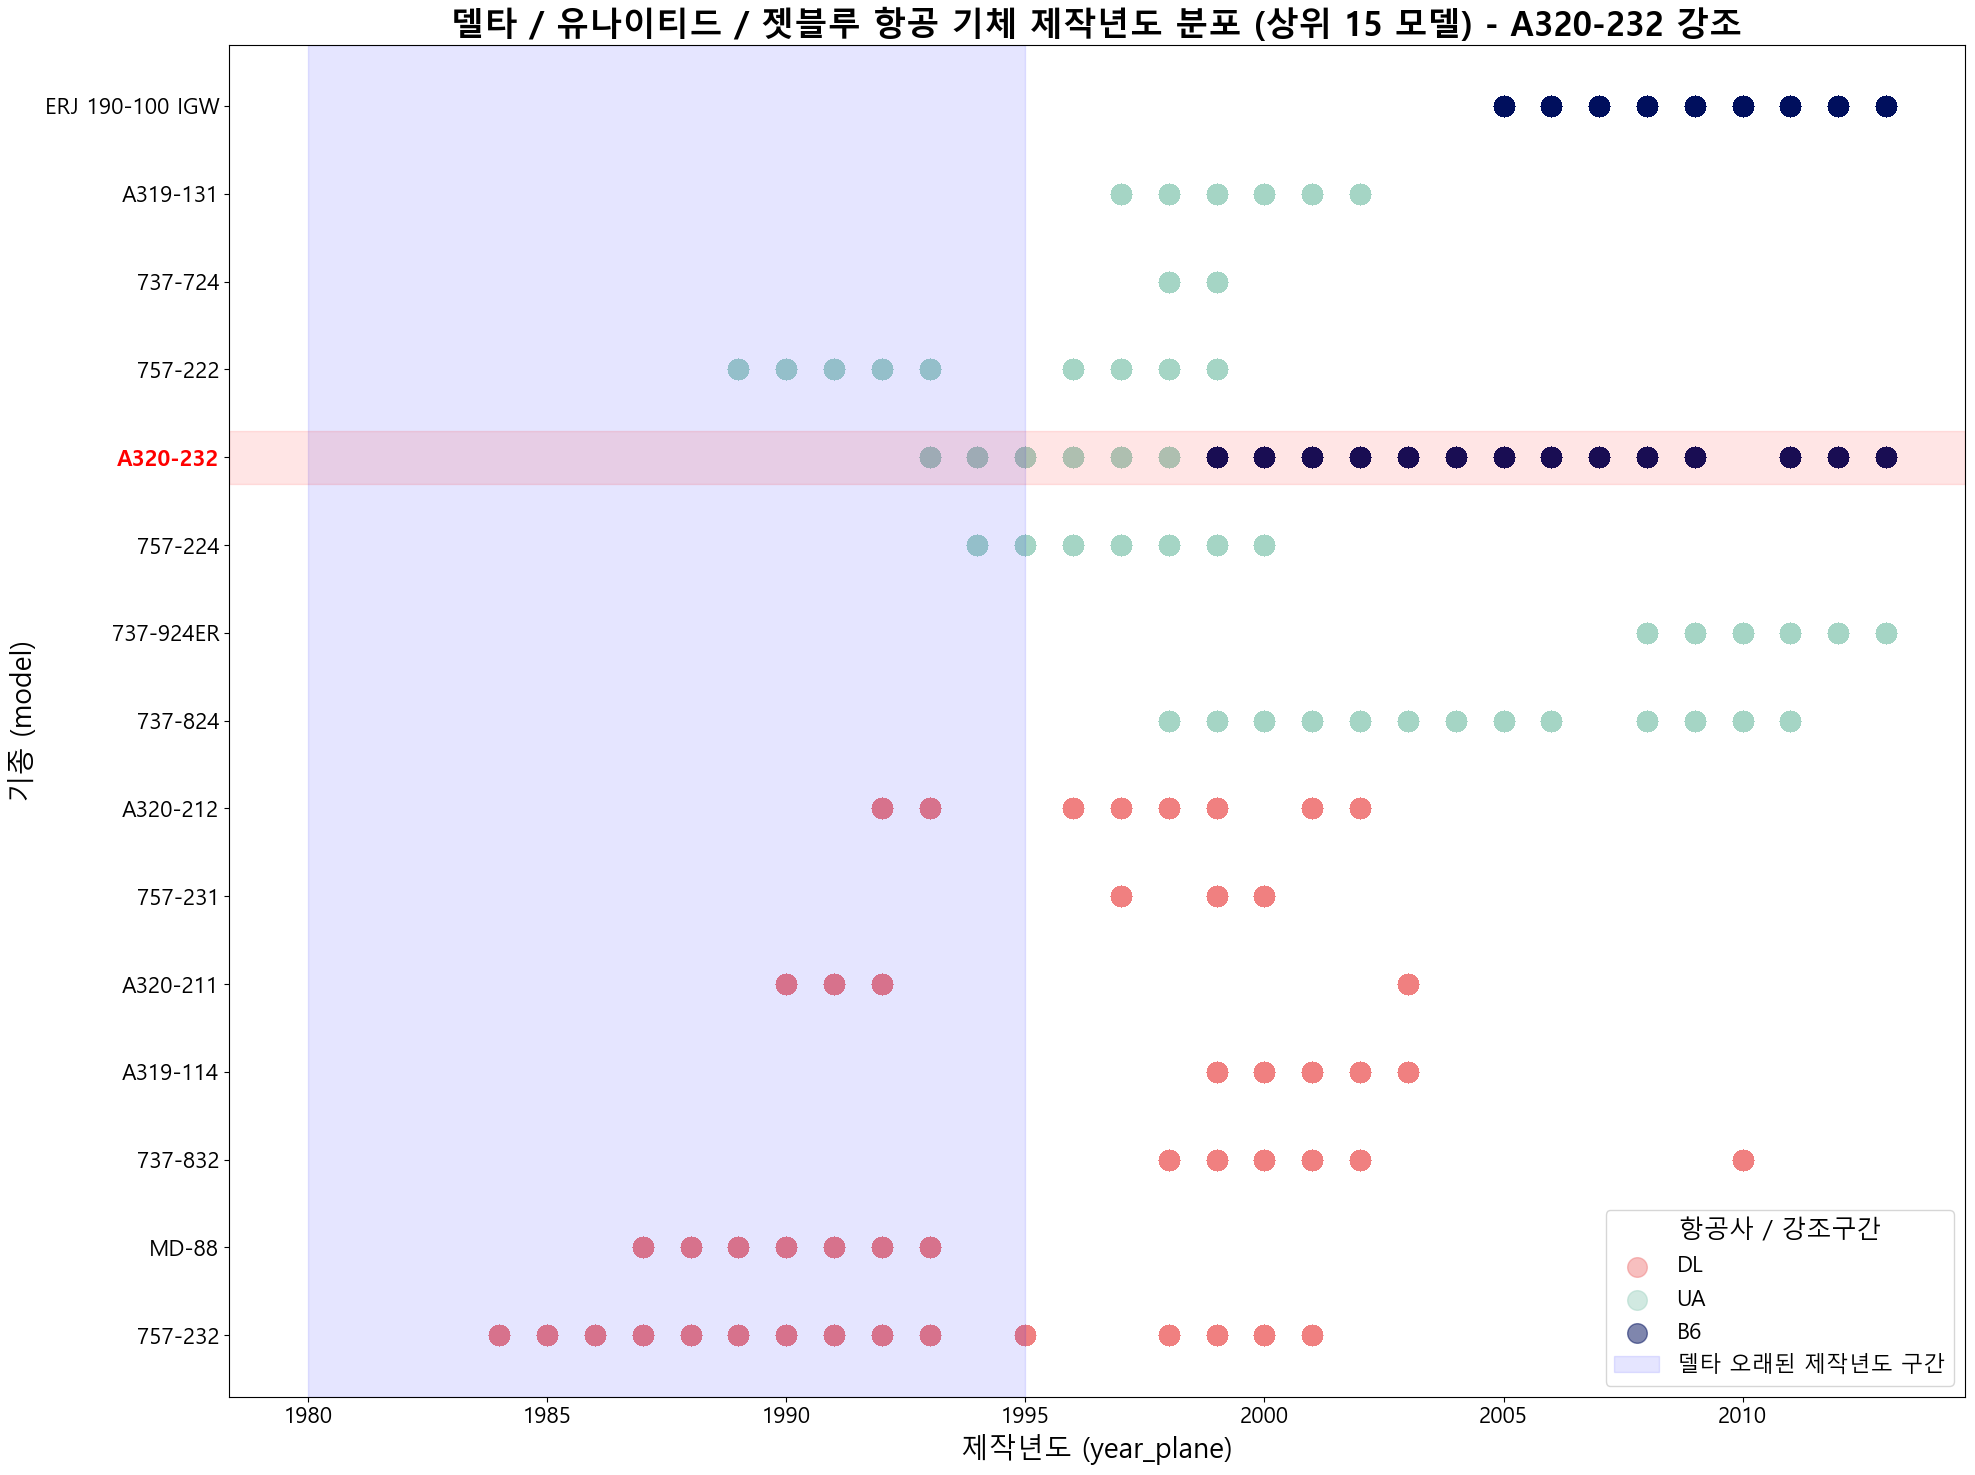

In [11]:
# ===== 1. CSV 불러오기 =====
df = pd.read_csv("./data/df_drop.csv")

# ===== 2. 한국어 폰트 설정 =====
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ===== 3. 대상 항공사 필터링 =====
target_carriers = ['DL', 'UA', 'B6']
df_target = df[df['carrier'].isin(target_carriers)].copy()

# 제작년도 결측치 제거
df_target = df_target.dropna(subset=['year_plane'])

# ===== 4. 모델별 개수 계산 후 상위 N개 모델만 표시 =====
N = 15
top_models = df_target['model'].value_counts().head(N).index
df_filtered = df_target[df_target['model'].isin(top_models)]

# ===== 5. 산점도 기본 시각화 =====
plt.figure(figsize=(20,15))

# 요청한 색상 코드 적용
colors = {'DL': '#f08080',  # 연한 빨강
          'UA': '#a5d5c5',  # 연한 민트
          'B6': '#000f5d'}  # 진한 네이비

for carrier in target_carriers:
    subset = df_filtered[df_filtered['carrier'] == carrier]
    plt.scatter(subset['year_plane'], subset['model'],
                alpha=0.5, s=200, c=colors[carrier], label=carrier)

# ===== 6. 델타항공 제작년도 낮은 부분 강조 =====
plt.axvspan(1980, 1995, color='blue', alpha=0.1, label='델타 오래된 제작년도 구간')

# ===== 7. y축 A320-232 라인 강조 =====
ax = plt.gca()
yticks = ax.get_yticks()
yticklabels = [label.get_text() for label in ax.get_yticklabels()]
if 'A320-232' in yticklabels:
    index = yticklabels.index('A320-232')
    y_value = yticks[index]
    plt.axhspan(y_value-0.3, y_value+0.3, color='red', alpha=0.1)

# ===== 8. y축 라벨 강조 =====
for label in ax.get_yticklabels():
    if label.get_text() == 'A320-232':
        label.set_color('red')
        label.set_fontweight('bold')

# ===== 9. 축 글씨 크기 및 범례, 타이틀 크기 조정 =====
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("제작년도 (year_plane)", fontsize=20)
plt.ylabel("기종 (model)", fontsize=20)
plt.title(f"델타 / 유나이티드 / 젯블루 항공 기체 제작년도 분포 (상위 {N} 모델) - A320-232 강조",
          fontsize=24, fontweight='bold')

plt.legend(title="항공사 / 강조구간", title_fontsize=18, fontsize=16)

plt.tight_layout()
plt.show()

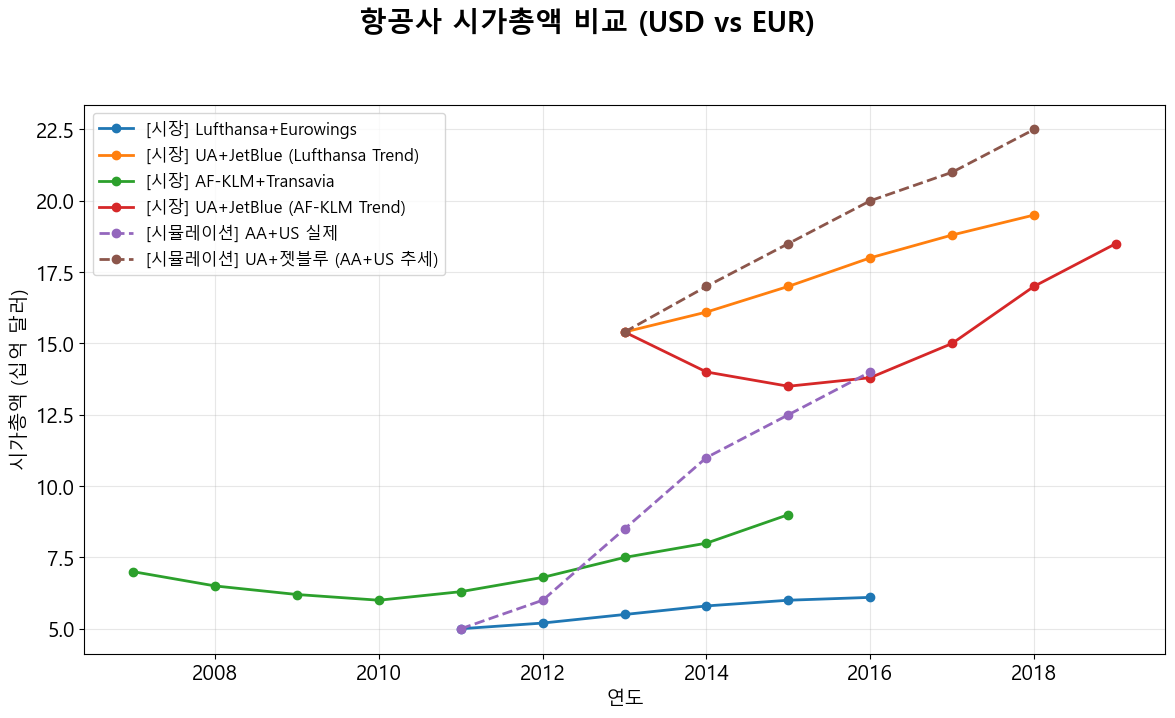

In [12]:
# ===== 1. 데이터 (시뮬레이션) =====
years_aa = np.array([2011, 2012, 2013, 2014, 2015, 2016])
aa_us_base = np.array([5.0, 6.0, 8.5, 11.0, 12.5, 14.0])

df_aa_real = pd.DataFrame({
    'Year': years_aa,
    'Type': ['AA + US Airways (실제)'] * len(years_aa),
    'MarketCap (Billion)': aa_us_base
})

years_ua_jetblue_aa = np.array([2013, 2014, 2015, 2016, 2017, 2018])
ua_jetblue_aa_trend = np.array([15.4, 17.0, 18.5, 20.0, 21.0, 22.5])

df_ua_jetblue_aa = pd.DataFrame({
    'Year': years_ua_jetblue_aa,
    'Type': ['UA+JetBlue (AA+US Trend)'] * len(years_ua_jetblue_aa),
    'MarketCap (Billion)': ua_jetblue_aa_trend
})

df_simulated = pd.concat([df_aa_real, df_ua_jetblue_aa])

# ===== 2. Market.csv 로드 =====
df_market = pd.read_csv("./data/Market.csv")

# ===== 3. 한국어 변환 매핑 =====
korean_map = {
    "United Airlines (UA)": "유나이티드 항공",
    "Delta Air Lines (DL)": "델타 항공",
    "American + US Airways (AA+US)": "아메리칸+US 항공",
    "Southwest Airlines (WN)": "사우스웨스트 항공",
    "JetBlue Airways (B6)": "젯블루 항공",
    "Alaska Airlines (AS)": "알래스카 항공",
    "ExpressJet Airlines (EV)": "익스프레스젯 항공",
    "Others (Others)": "기타",
    "AA + US Airways (실제)": "AA+US 실제",
    "UA+JetBlue (AA+US Trend)": "UA+젯블루 (AA+US 추세)"
}

# ===== 4. 시각화 =====
usd_to_eur = 0.9
fig, ax1 = plt.subplots(figsize=(12, 7))

# Market 데이터 (실선)
for t in df_market['Type'].unique():
    subset = df_market[df_market['Type'] == t]
    ax1.plot(
        subset['Year'],
        subset['MarketCap (Billion)'],
        marker='o',
        linewidth=2,
        label=f"[시장] {korean_map.get(t, t)}"
    )

# 시뮬레이션 데이터 (점선)
for t in df_simulated['Type'].unique():
    subset = df_simulated[df_simulated['Type'] == t]
    ax1.plot(
        subset['Year'],
        subset['MarketCap (Billion)'],
        marker='o',
        linestyle='--',
        linewidth=2,
        label=f"[시뮬레이션] {korean_map.get(t, t)}"
    )

# 왼쪽 y축 (USD)
ax1.set_xlabel("연도", fontsize=14)
ax1.set_ylabel("시가총액 (십억 달러)", fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

# 제목
fig.suptitle("항공사 시가총액 비교 (USD vs EUR)", fontsize=20, fontweight='bold', y=1.03)

# 범례 (왼쪽 위)
ax1.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()